In [3]:
import pandas as pd
import numpy as np

# Load all sample files
sample1 = pd.read_csv("Sample1All_Data.csv")
sample2 = pd.read_csv("Sample2All_Data.csv")
sample3 = pd.read_csv("Sample3All_Data.csv")
sample4 = pd.read_csv("Sample4All_Data.csv")

# Concatenate all sample dataframes side-by-side (columns), ignoring the original time column if present
samples = [sample1, sample2, sample3, sample4]
for i in range(len(samples)):
    if "Time" in samples[i].columns:
        samples[i] = samples[i].drop(columns=["Time"])

# Combine all sample columns
combined_df = pd.concat(samples, axis=1)

# Determine the number of rows needed (max of all input lengths)
max_length = max([len(df) for df in samples])

# Generate a time column that increases by 0.02 per step
time = np.arange(0, 0.02 * max_length, 0.02)
time = time[:max_length]  # Just in case floating point goes slightly over

# Truncate or extend combined_df to match the time length
combined_df = combined_df.reindex(range(max_length)).reset_index(drop=True)

# Add the time column to the right
combined_df["Time"] = time

# Save the result
combined_df.to_csv("Combined_Sample_Data.csv", index=False)

print("Combined data saved as Combined_Sample_Data.csv")


Combined data saved as Combined_Sample_Data.csv


In [4]:
import pandas as pd

# Load the uploaded CSV file
file_path = "Combined_Sample_Data.csv"
df = pd.read_csv(file_path)

# Show the first few rows and the column names to understand the structure
df.head(), df.columns

(     S1_Pre     S1_T1     S1_T2     S1_T3     S1_T4     S1_T5   S1_T5_2  \
 0 -0.020767 -0.018692 -0.002083 -0.022842 -0.016617  0.093468 -0.024925   
 1 -0.018692 -0.016617 -0.002083 -0.020767 -0.018692  0.135010 -0.022850   
 2 -0.014542 -0.016617 -0.006233 -0.022842 -0.022850  0.182785 -0.029076   
 3 -0.012459 -0.010384  0.008308 -0.020767 -0.027000  0.216019 -0.027000   
 4 -0.014542 -0.016617  0.006226 -0.018692 -0.020775  0.216019 -0.029076   
 
      S2_Pre     S2_T1     S2_T2  ...     S3_T3     S3_T4     S3_T5    S4_Pre  \
 0 -0.018700 -0.022850 -0.031158  ...  0.004150  0.002083  0.002075 -0.012466   
 1 -0.008308 -0.022850 -0.035309  ...  0.004150  0.004158  0.002075 -0.014542   
 2 -0.016617 -0.027008 -0.029083  ...  0.002075  0.008308  0.000000 -0.010384   
 3 -0.018700 -0.029083 -0.031158  ... -0.002075  0.000000  0.000000 -0.010384   
 4 -0.010391 -0.029083 -0.035309  ...  0.000000 -0.002075  0.002075 -0.012466   
 
    S4_T1_V2     S4_T2     S4_T3     S4_T4     S4_T5  

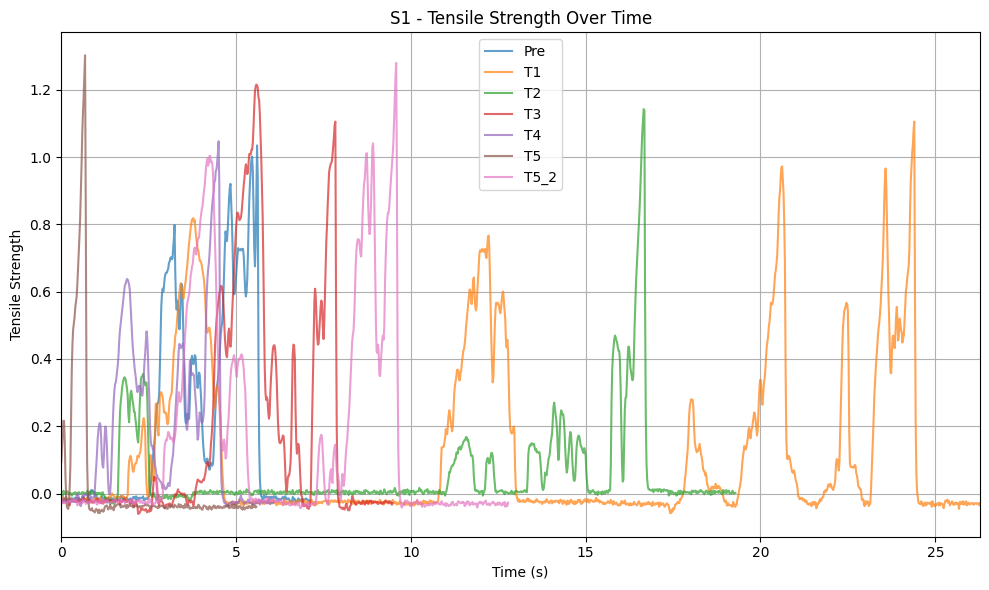

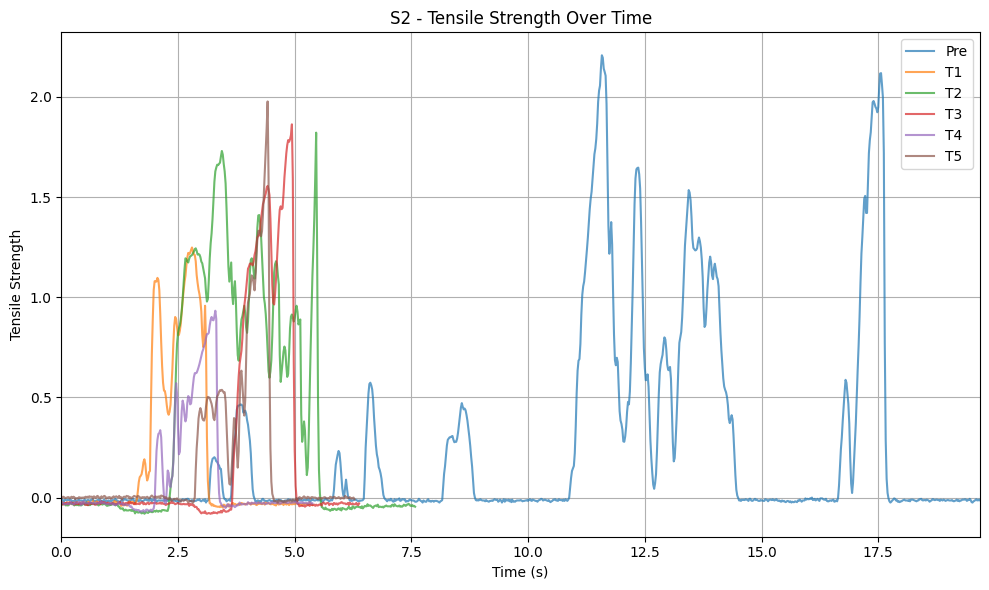

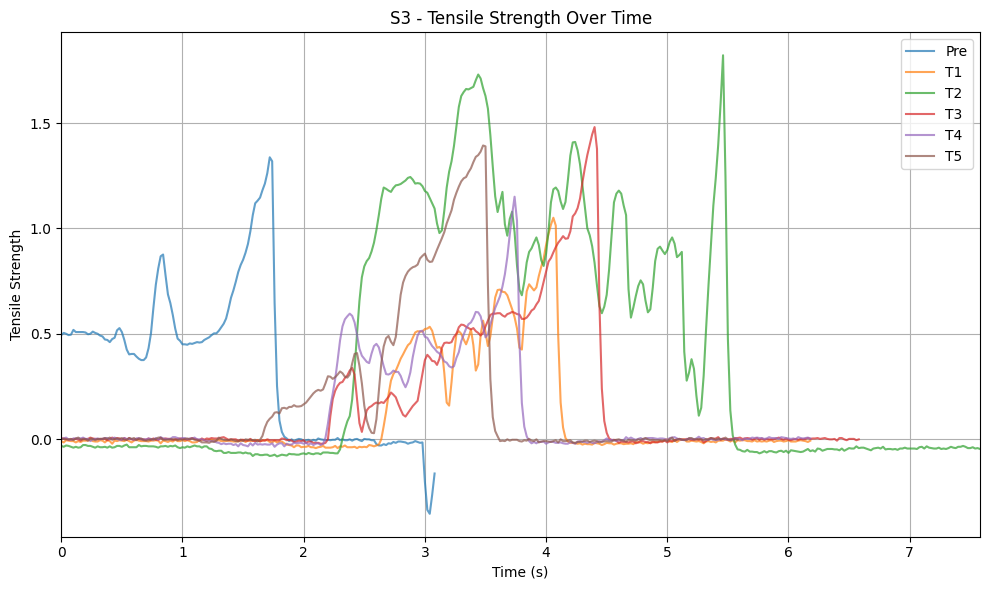

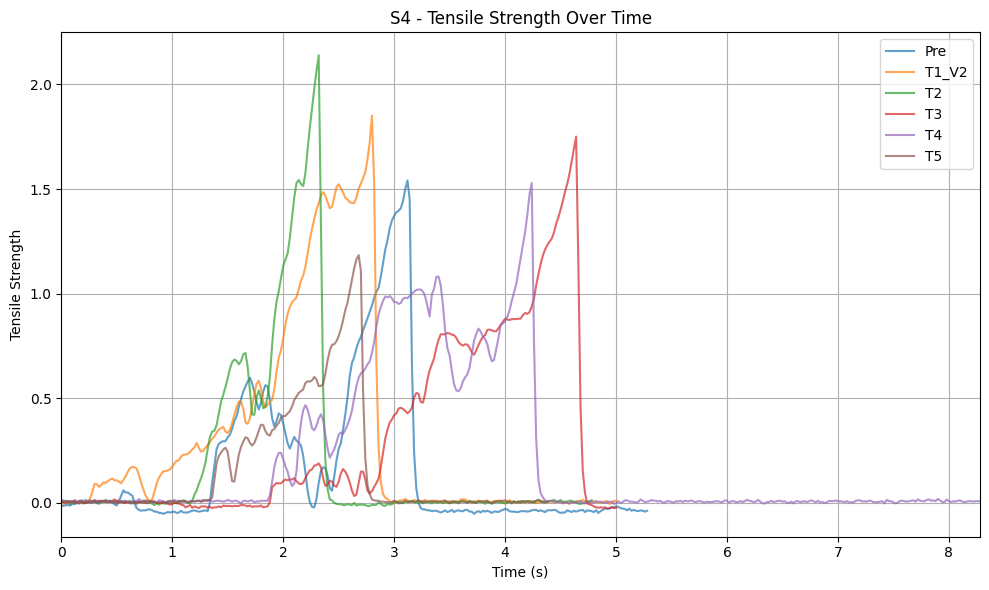

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume df is already defined and loaded

# Identify samples
samples = ['S1', 'S2', 'S3', 'S4']

for sample in samples:
    # Find all columns corresponding to this sample
    sample_cols = [col for col in df.columns if col.startswith(sample)]

    # Create a new figure for each sample
    plt.figure(figsize=(10, 6))

    # Plot each treatment line
    for col in sample_cols:
        # Drop NaNs for that column
        valid_data = df[['Time', col]].dropna()

        if not valid_data.empty:
            plt.plot(valid_data['Time'], valid_data[col],
                     label=col.replace(sample + '_', ''), alpha=0.7)

    plt.title(f"{sample} - Tensile Strength Over Time")
    plt.xlabel("Time (s)")
    plt.ylabel("Tensile Strength")
    plt.legend()
    plt.grid(True)

    # Dynamically scale x-axis to match the maximum available time for this sample
    all_times = pd.concat([df[['Time', col]].dropna()['Time'] for col in sample_cols])
    if not all_times.empty:
        plt.xlim(0, all_times.max())

    plt.tight_layout()
    plt.show()

In [6]:
import pandas as pd

# Assuming df is your DataFrame

# Step 1: Drop or exclude the Time column from processing
df_cleaned = df.drop(columns=['Time'])

# Step 2: Average S1_T5 and S1_T5_2, and create a new column
df_cleaned['S1_T5'] = df[['S1_T5', 'S1_T5_2']].mean(axis=1)

# Step 3: Drop the now redundant S1_T5_2
df_cleaned = df_cleaned.drop(columns=['S1_T5_2'])

# Step 4: Rename S4_T1_V2 to S4_T1
df_cleaned = df_cleaned.rename(columns={'S4_T1_V2': 'S4_T1'})

# Step 5: Get the maximum of each column
max_values = df_cleaned.max()

print(max_values)


S1_Pre    1.034401
S1_T1     1.105019
S1_T2     1.142403
S1_T3     1.215111
S1_T4     1.046860
S1_T5     1.279495
S2_Pre    2.207954
S2_T1     1.248337
S2_T2     1.821617
S2_T3     1.863159
S2_T4     0.932617
S2_T5     1.977402
S3_Pre    1.337654
S3_T1     1.051018
S3_T2     1.821617
S3_T3     1.480972
S3_T4     1.150719
S3_T5     1.393738
S4_Pre    1.541206
S4_T1     1.850700
S4_T2     2.139412
S4_T3     1.750999
S4_T4     1.528748
S4_T5     1.183952
dtype: float64


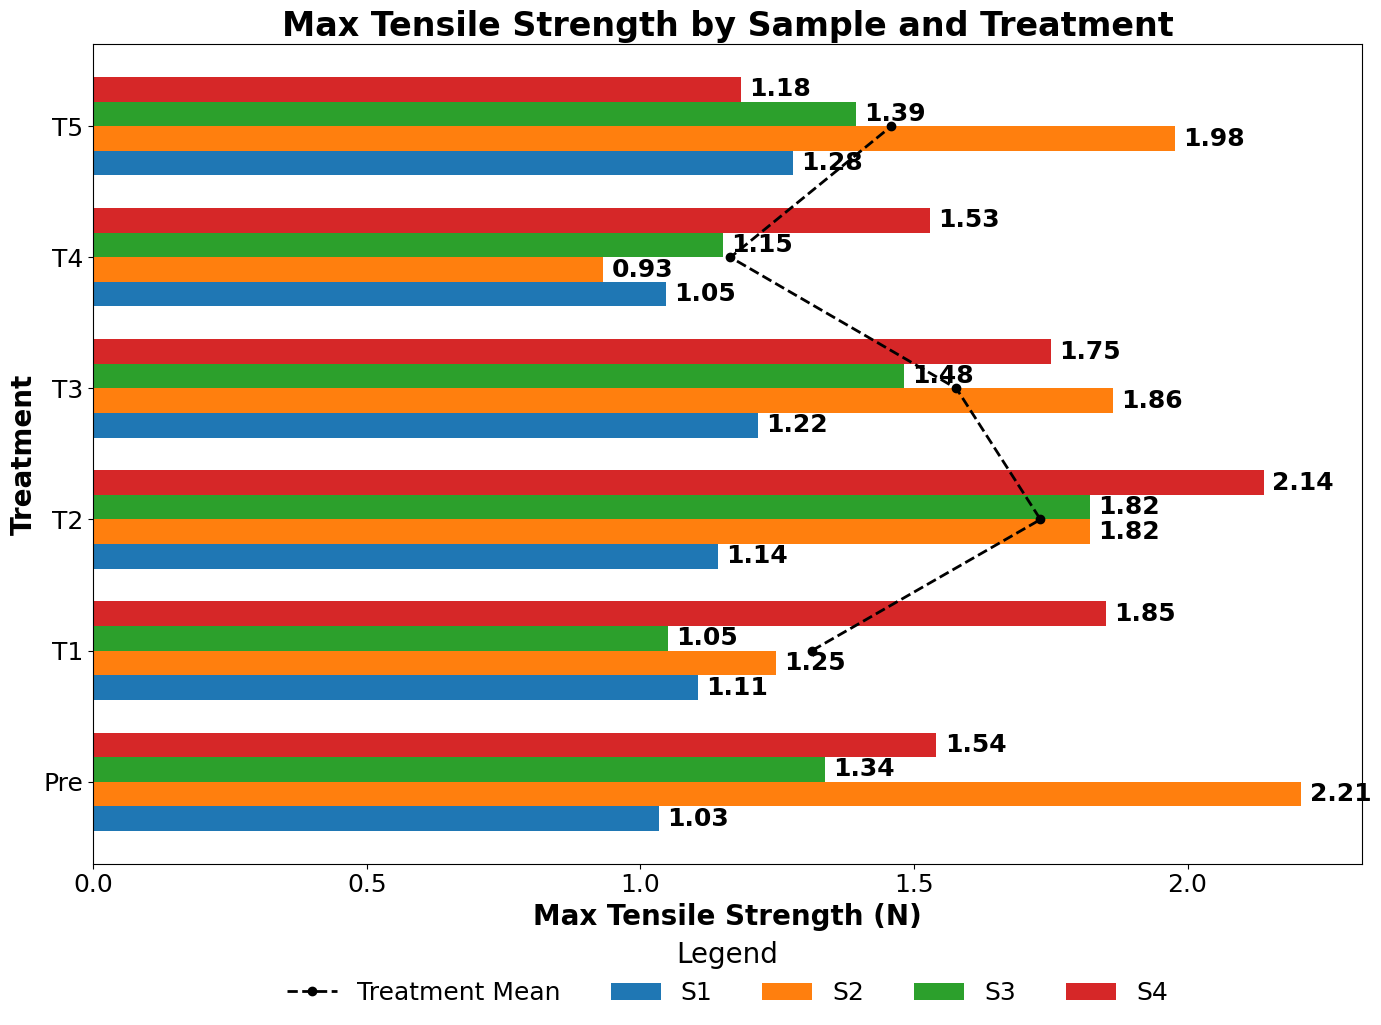

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Max values (your data)
data = {
    'S1_Pre': 1.034401, 'S1_T1': 1.105019, 'S1_T2': 1.142403, 'S1_T3': 1.215111, 'S1_T4': 1.046860, 'S1_T5': 1.279495,
    'S2_Pre': 2.207954, 'S2_T1': 1.248337, 'S2_T2': 1.821617, 'S2_T3': 1.863159, 'S2_T4': 0.932617, 'S2_T5': 1.977402,
    'S3_Pre': 1.337654, 'S3_T1': 1.051018, 'S3_T2': 1.821617, 'S3_T3': 1.480972, 'S3_T4': 1.150719, 'S3_T5': 1.393738,
    'S4_Pre': 1.541206, 'S4_T1': 1.850700, 'S4_T2': 2.139412, 'S4_T3': 1.750999, 'S4_T4': 1.528748, 'S4_T5': 1.183952
}

df = pd.Series(data)

# Prepare DataFrame
df = df.rename_axis("Sample_Treatment").reset_index(name="MaxValue")
df[['Sample', 'Treatment']] = df['Sample_Treatment'].str.extract(r'(S\d+)_(T\d|Pre)')

pivoted = df.pivot(index='Treatment', columns='Sample', values='MaxValue').sort_index()

# Separate line plot data (exclude 'Pre')
line_treatments = ['T1', 'T2', 'T3', 'T4', 'T5']
line_data = pivoted.loc[line_treatments]
treatment_means = line_data.mean(axis=1)

# Define tab10 colors for 4 samples
tab10_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # S1-blue, S2-orange, S3-green, S4-red

# Plot
fig, ax = plt.subplots(figsize=(14, 12))  # larger figure

# Bar plot
bar_plot = pivoted.plot(kind='barh', ax=ax, width=0.75, color=tab10_colors)

# Add value labels
for container in bar_plot.containers:
    for bar in container:
        width = bar.get_width()
        if pd.notna(width):
            bar_center = bar.get_y() + bar.get_height() / 2
            bar_plot.annotate(f'{width:.2f}',
                              xy=(width, bar_center),
                              xytext=(6, 0),  # more horizontal space
                              textcoords="offset points",
                              ha='left', va='center',
                              fontsize=18, fontweight='bold', zorder=5)

# Line plot (Treatment Mean)
line_y = np.arange(1, 6)
line_x = treatment_means.values
ax.plot(line_x, line_y, color='black', marker='o', linestyle='--', label='Treatment Mean', zorder=6, linewidth=2)

# Larger fonts for everything
ax.set_title("Max Tensile Strength by Sample and Treatment", fontsize=24, fontweight='bold')
ax.set_xlabel("Max Tensile Strength (N)", fontsize=20, fontweight='bold')
ax.set_ylabel("Treatment", fontsize=20, fontweight='bold')
ax.set_yticks(np.arange(len(pivoted.index)))
ax.set_yticklabels(pivoted.index, fontsize=18)
ax.tick_params(axis='x', labelsize=18)

# Larger legend
ax.legend(title='Legend', loc='lower center', bbox_to_anchor=(0.5, -0.2),
          ncol=5, frameon=False, fontsize=18, title_fontsize=20)

plt.tight_layout(rect=[0, 0.12, 1, 1])
plt.show()


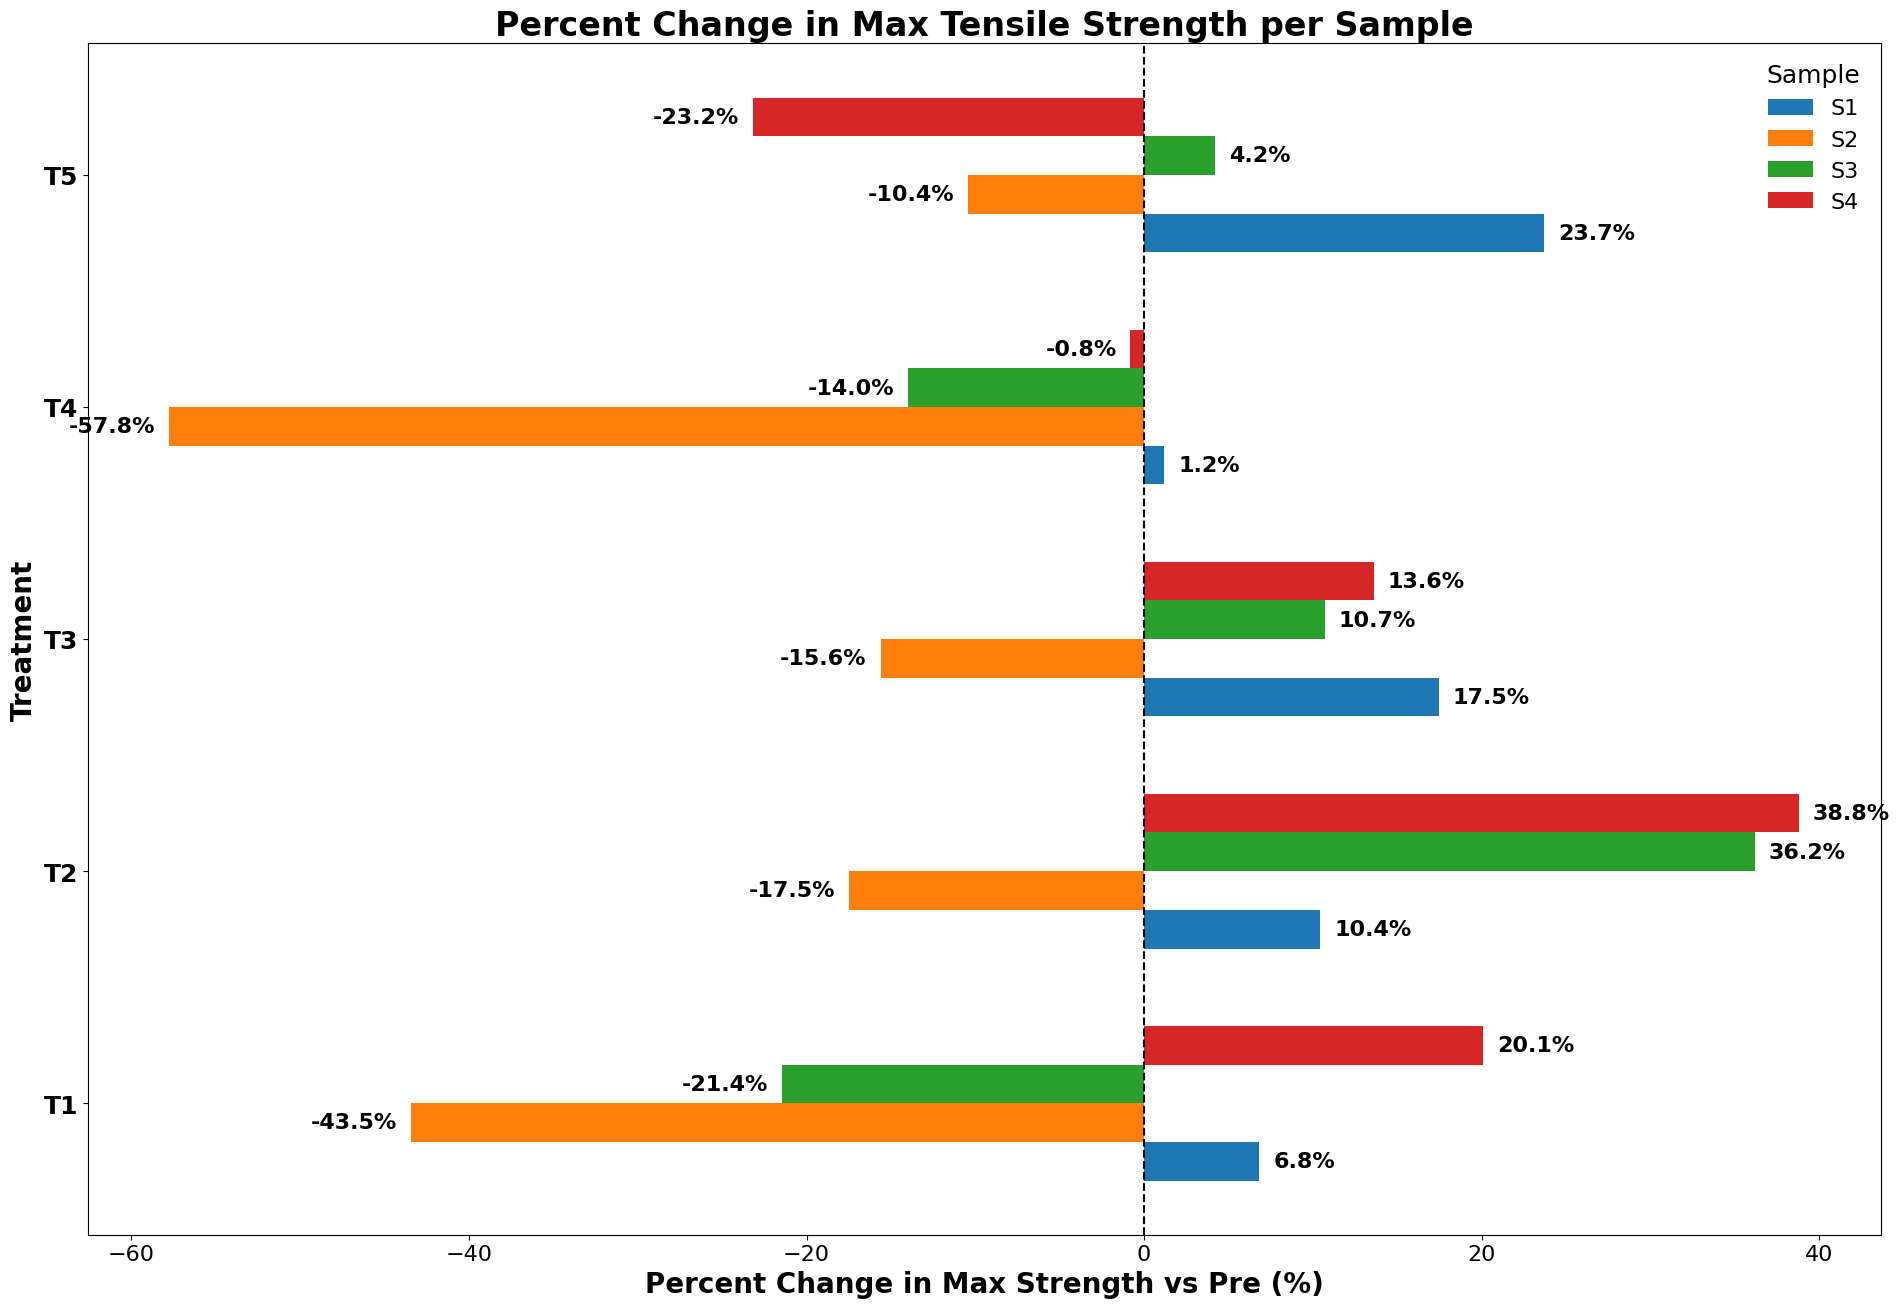

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Max tensile strength data
max_data = {
    'S1_Pre': 1.034401, 'S1_T1': 1.105019, 'S1_T2': 1.142403, 'S1_T3': 1.215111, 'S1_T4': 1.046860, 'S1_T5': 1.279495,
    'S2_Pre': 2.207954, 'S2_T1': 1.248337, 'S2_T2': 1.821617, 'S2_T3': 1.863159, 'S2_T4': 0.932617, 'S2_T5': 1.977402,
    'S3_Pre': 1.337654, 'S3_T1': 1.051018, 'S3_T2': 1.821617, 'S3_T3': 1.480972, 'S3_T4': 1.150719, 'S3_T5': 1.393738,
    'S4_Pre': 1.541206, 'S4_T1': 1.850700, 'S4_T2': 2.139412, 'S4_T3': 1.750999, 'S4_T4': 1.528748, 'S4_T5': 1.183952
}

# Organize into DataFrame
df_max = pd.Series(max_data).rename_axis("Sample_Treatment").reset_index(name="MaxValue")
df_max[['Sample', 'Treatment']] = df_max['Sample_Treatment'].str.extract(r'(S\d+)_(T\d|Pre)')
df_pivot = df_max.pivot(index="Sample", columns="Treatment", values="MaxValue").reset_index()

# Compute percent change vs Pre
samples = df_pivot["Sample"]
treatments = ['T1', 'T2', 'T3', 'T4', 'T5']
percent_changes = []

for _, row in df_pivot.iterrows():
    sample = row["Sample"]
    pre = row["Pre"]
    for treatment in treatments:
        change = ((row[treatment] - pre) / pre) * 100
        percent_changes.append((treatment, sample, change))

# Convert to DataFrame for plotting
df_plot = pd.DataFrame(percent_changes, columns=["Treatment", "Sample", "Percent Change"])

# Define tab10 color palette
sample_colors = {
    'S1': '#1f77b4',  # blue
    'S2': '#ff7f0e',  # orange
    'S3': '#2ca02c',  # green
    'S4': '#d62728'   # red
}

# Spacing between groups
group_spacing = 1.5
num_treatments = len(treatments)
group_centers = np.arange(num_treatments) * group_spacing

# Bigger figure to handle long labels
fig, ax = plt.subplots(figsize=(20, 14))  # wider plot

bar_height = 0.25

# Plot horizontal bars for each sample
for i, sample in enumerate(samples):
    sample_data = df_plot[df_plot["Sample"] == sample]
    values = sample_data["Percent Change"].values
    positions = group_centers + (i - 1.5) * bar_height
    bars = ax.barh(positions, values, height=bar_height, label=sample, color=sample_colors[sample])

    # Annotate each bar
    for bar in bars:
        width = bar.get_width()
        if width >= 0:
            ha = 'left'
            offset = 10
        else:
            ha = 'right'
            offset = -10
        ax.annotate(f'{width:.1f}%',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(offset, 0),
                    textcoords="offset points",
                    ha=ha, va='center',
                    fontsize=16, fontweight='bold')

# Formatting
ax.axvline(0, color='black', linestyle='--', linewidth=1.5)
ax.set_yticks(group_centers)
ax.set_yticklabels(treatments, fontsize=18, fontweight='bold')
ax.set_ylabel("Treatment", fontsize=20, fontweight='bold')
ax.set_xlabel("Percent Change in Max Strength vs Pre (%)", fontsize=20, fontweight='bold')
ax.set_title("Percent Change in Max Tensile Strength per Sample", fontsize=24, fontweight='bold')
ax.tick_params(axis='x', labelsize=16)

# Legend
ax.legend(title="Sample", fontsize=16, title_fontsize=18, loc='upper right', frameon=False)

# Adjust plot padding
plt.subplots_adjust(left=0.12, right=0.92)  # widen space on both sides
plt.tight_layout(pad=4)

# Optional: Save high-res
# plt.savefig("percent_change_spaced_wide.png", dpi=600, bbox_inches='tight')
# plt.savefig("percent_change_spaced_wide.pdf", bbox_inches='tight')

plt.show()

In [15]:
import pandas as pd
import numpy as np

# Load your data
combined_df = pd.read_csv("Combined_Sample_Data.csv")

# Function to round to 4 significant figures
def round_sig(x, sig=3):
    if pd.isnull(x):  # leave NaNs unchanged
        return x
    if x == 0:
        return 0
    return round(x, sig - int(np.floor(np.log10(abs(x)))) - 1)

# Apply to all numeric columns
combined_df = combined_df.applymap(lambda x: round_sig(x) if isinstance(x, (int, float, np.number)) else x)
combined_df.to_csv("Combined_Sample_Data_Sigfigs.csv")

/tmp/ipython-input-15-2549720627.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  combined_df = combined_df.applymap(lambda x: round_sig(x) if isinstance(x, (int, float, np.number)) else x)
